<a href="https://colab.research.google.com/github/ivyclare/Project-50_Projects_In_Deep_Learning/blob/master/GAN_Implementation_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing libraries we need
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Mini-batch size
mb_size = 64

# This will transform data to tensor format which is pytorch's expexted format
transform = transforms.ToTensor()

# Here we download the dataset and trnsfrom it, train=True will only download traning dataset
traindata = torchvision.datasets.MNIST('./NewData/', download=True, transform=transform, train = True)

# Loading the training data
trainloader = torch.utils.data.DataLoader(traindata, shuffle=True, batch_size=mb_size)

0it [00:00, ?it/s]

9920512it [00:02, 3504574.66it/s]                             


Extracting ./NewData/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 58282.24it/s]                           
0it [00:00, ?it/s]

Extracting ./NewData/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 961654.48it/s]                             
0it [00:00, ?it/s]

Extracting ./NewData/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 22284.37it/s]            

Extracting ./NewData/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


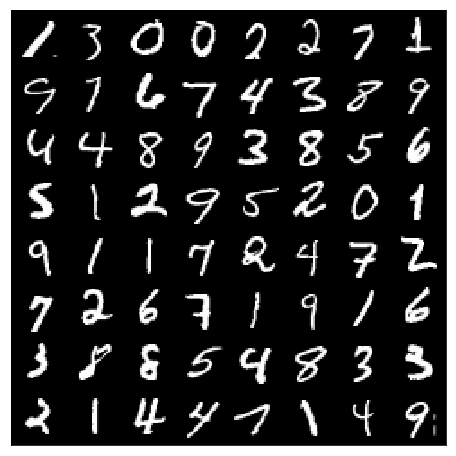

torch.Size([64, 1, 28, 28])


In [0]:
# Just as an example we are going to visualize 

# We define an iterator 

dataiter = iter(trainloader)
imgs, labels = dataiter.next()

def imshow(imgs):
    """ Visualizing images """
    # make_grid will make a grid out of images
    imgs = torchvision.utils.make_grid(imgs)
    
    # transfoming tensors to numpy arrays
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

imshow(imgs)

print(imgs.size())

In [0]:
# Defining the parematers of the network
h_dim = 128    # number of hidden neurons in our hidden layer
Z_dim = 100    # dimension of the input noise for generator
lr = 1e-3      # learning rate
X_dim = imgs.view(imgs.size(0), -1).size(1)

print(X_dim)

784


In [0]:
#Initializing Weights
# Initializing the network with the right weights is very important if you want your neural network to function properly. 
# We need to make sure that the weights are in a reasonable range before we start training the network. 

# Xavier Initialiation is the weights initialization technique that tries to make 
#the variance of the outputs of a layer to be equal to the variance of its inputs.

def xavier_init(m):
    """ Xavier initialization """
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)

In [0]:
# Defining the Genrator 

class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, X_dim),
            nn.Sigmoid()
        )
        self.model.apply(xavier_init)
    
    def forward(self, input):
        return self.model(input)
    
test = Gen()
print(test)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [0]:
# Defining the Discriminator

class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, h_dim),
            nn.ReLU(),
            nn.Linear(h_dim, 1),
            nn.Sigmoid()
        )
        self.model.apply(xavier_init)
    
    def forward(self, input):
        return self.model(input)
    
test = Dis()
print(test)

Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [0]:
# Instantiating the networks
G = Gen()
D = Dis()

In [0]:
# Defining solver(optimizer) to do the mini batch stochastic gradient descent 
# one for each network 
G_solver = opt.Adam(G.parameters(), lr = lr)
D_solver = opt.Adam(D.parameters(), lr = lr)

# One important note
Both discriminator and genrator are competing for $D(G(z))$ term Discrimator wants to maximize it, while Generator wants to minimize it. $D(G(z))$ stands for, probablity of labling fake data correctly by discriminator. 

Epoch:0,   G_loss:6.780333618365371,   D_loss:0.051823962535679356


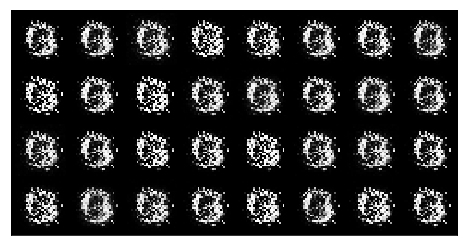

Epoch:1,   G_loss:6.00957957640894,   D_loss:0.04675194335533485


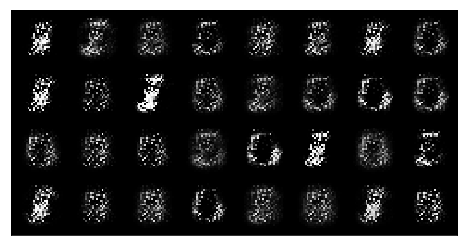

Epoch:2,   G_loss:5.558048266591802,   D_loss:0.07717327964899223


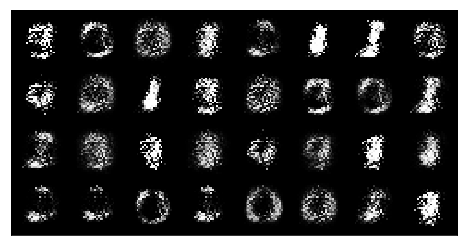

Epoch:3,   G_loss:4.960988967657598,   D_loss:0.16664652324029441


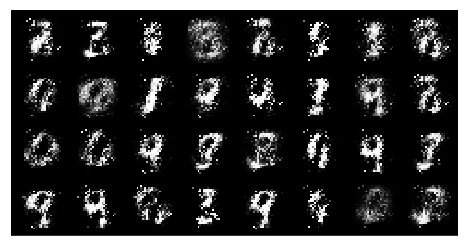

Epoch:4,   G_loss:5.104521977876041,   D_loss:0.21521379695391096


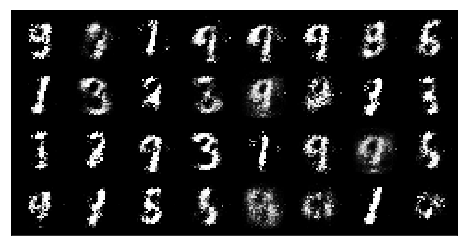

Epoch:5,   G_loss:3.888078932060616,   D_loss:0.34575693148857495


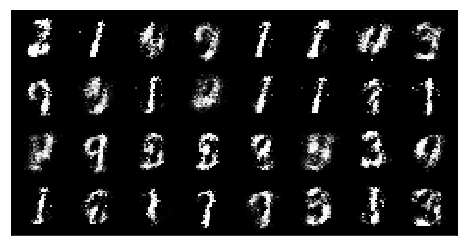

Epoch:6,   G_loss:3.3251001321430653,   D_loss:0.4374083615283468


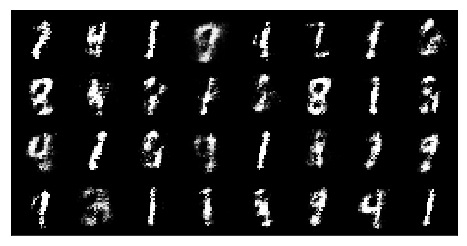

Epoch:7,   G_loss:3.0409561726076006,   D_loss:0.5016010488941471


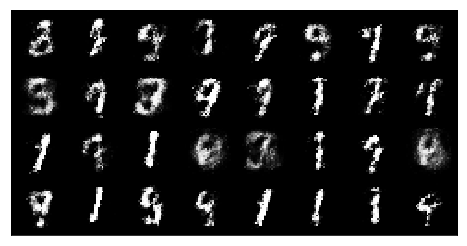

Epoch:8,   G_loss:2.7438472452194196,   D_loss:0.5714840183951961


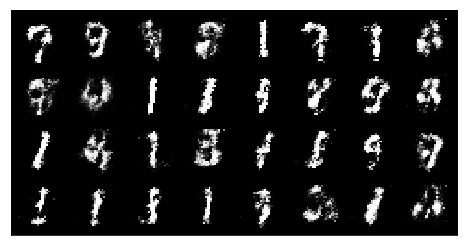

Epoch:9,   G_loss:2.663109766394853,   D_loss:0.6364746651034365


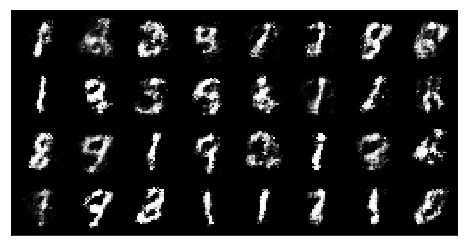

Epoch:10,   G_loss:2.5161492711445415,   D_loss:0.6751383651357724


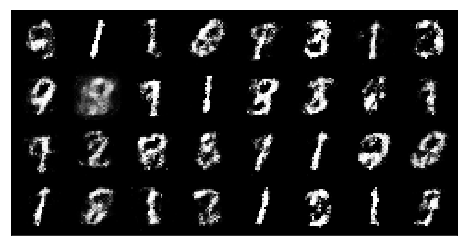

Epoch:11,   G_loss:2.2342060698883364,   D_loss:0.7210965802801698


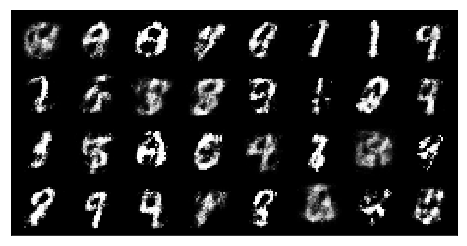

Epoch:12,   G_loss:2.1117278087113713,   D_loss:0.7499415566926317


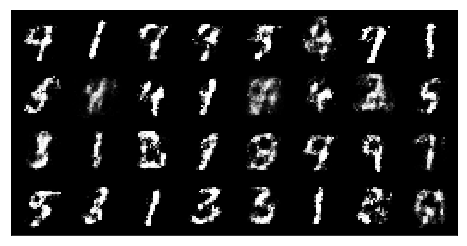

Epoch:13,   G_loss:2.0673507392279373,   D_loss:0.7806548902919805


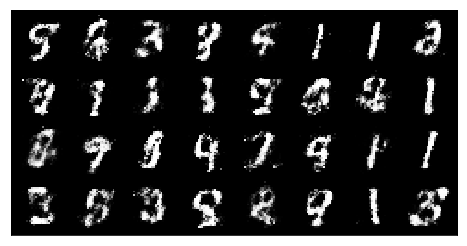

Epoch:14,   G_loss:2.1079759327079186,   D_loss:0.7935594278040217


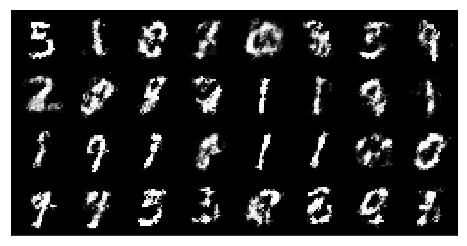

Epoch:15,   G_loss:1.969395703090025,   D_loss:0.8082863376783663


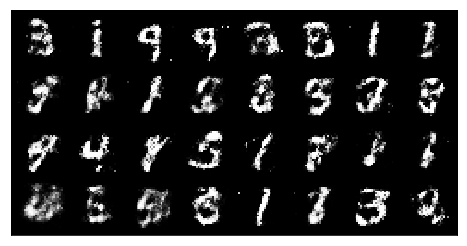

Epoch:16,   G_loss:1.9202507319989235,   D_loss:0.7911190200906827


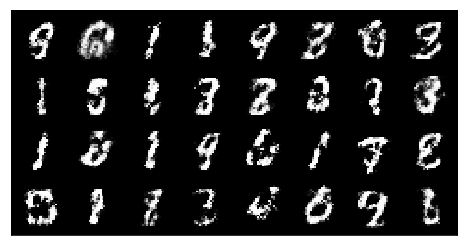

Epoch:17,   G_loss:1.9170077046605825,   D_loss:0.8113874552854851


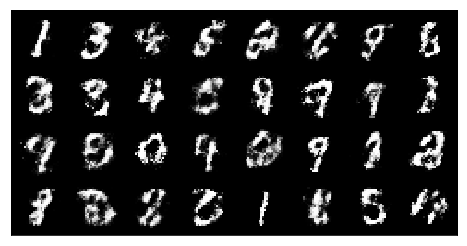

Epoch:18,   G_loss:1.8549697747362701,   D_loss:0.8123891168057538


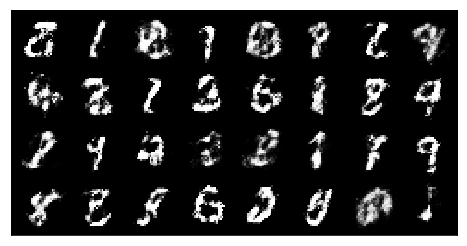

Epoch:19,   G_loss:1.8371100653209158,   D_loss:0.8223491370805037


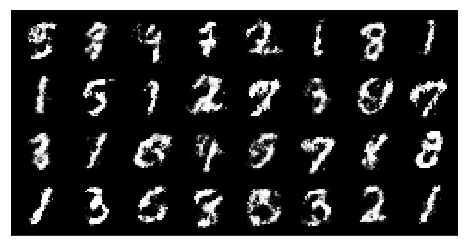

Epoch:20,   G_loss:1.868846380888526,   D_loss:0.8336165299547761


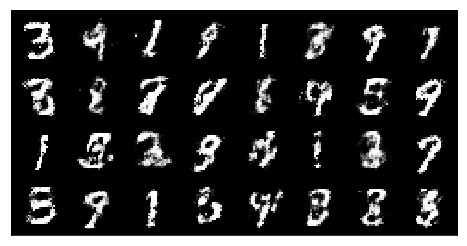

Epoch:21,   G_loss:1.8492700516033782,   D_loss:0.8419429024399471


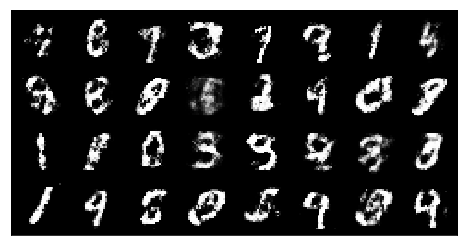

Epoch:22,   G_loss:1.8255670366765084,   D_loss:0.8406893119756093


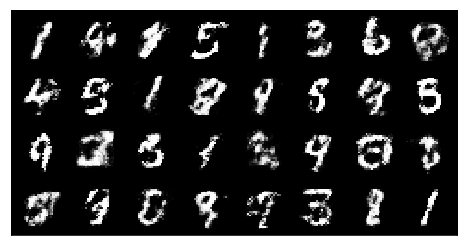

Epoch:23,   G_loss:1.8508752782715918,   D_loss:0.8210754322090636


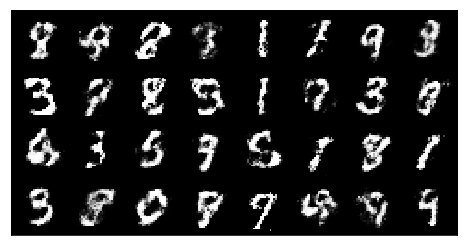

Epoch:24,   G_loss:1.8764566415662705,   D_loss:0.8253234751951466


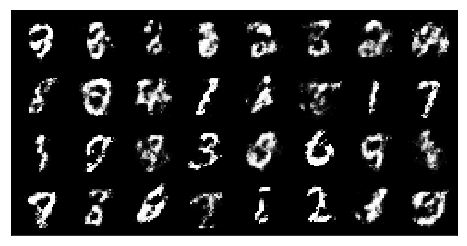

Epoch:25,   G_loss:1.903346850927959,   D_loss:0.8059057073552471


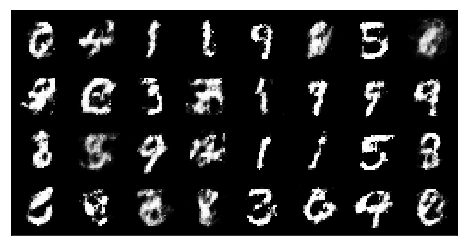

Epoch:26,   G_loss:1.9079816003343952,   D_loss:0.7873262081827436


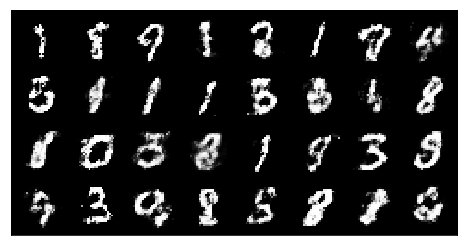

Epoch:27,   G_loss:1.9572198340125175,   D_loss:0.778538521005909


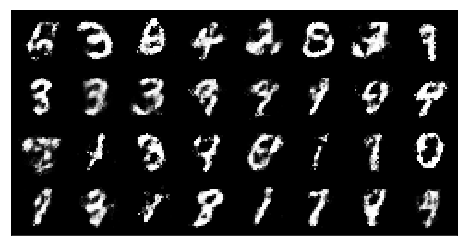

Epoch:28,   G_loss:1.9595847940648288,   D_loss:0.7821924292456621


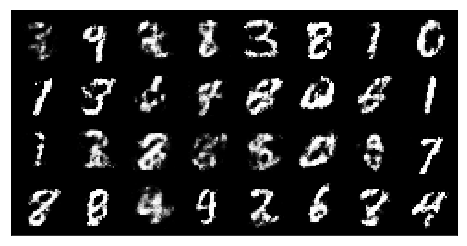

Epoch:29,   G_loss:1.9816147949395657,   D_loss:0.7778810379601745


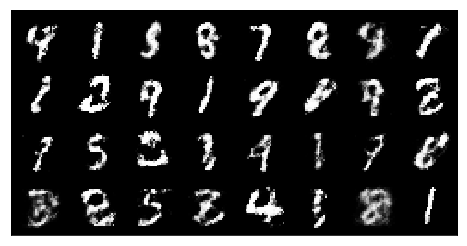

In [0]:
# Defining the training for loop
for epoch in range(30):
    G_loss_run = 0.0
    D_loss_run = 0.0
    for i,data in enumerate(trainloader):
        X, _ = data
        X = X.view(X.size(0), -1)
        mb_size = X.size(0)
        
        # Definig labels for real (1s) and fake (0s) images
        one_labels = torch.ones(mb_size, 1)
        zero_labels = torch.zeros(mb_size, 1)
        
        # Random normal distribution for each image
        z = torch.randn(mb_size, Z_dim)
        
        
        # Feed forward in discriminator both 
        # fake and real images
        D_real = D(X) # Pass real images through the discriminator model
        # fakes = G(z)
        D_fake = D(G(z)) # Generate fake images through the generator and pass them into the discriminator model
        
        # Defining the loss for Discriminator
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        D_loss = D_fake_loss + D_real_loss
        
        # backward propagation for discriminator
        D_solver.zero_grad()
        D_loss.backward()
        D_solver.step()
        
        # Feed forward for generator
        z = torch.randn(mb_size, Z_dim)
        D_fake = D(G(z))
        
        # loss function of generator
        G_loss = F.binary_cross_entropy(D_fake, one_labels)
        
        # backward propagation for generator
        G_solver.zero_grad()
        G_loss.backward()
        G_solver.step()
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    # printing loss after each epoch 
    print('Epoch:{},   G_loss:{},   D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1) ))
    
    # Plotting fake images generated after each epoch by generator
    samples = G(z).detach()
    samples = samples.view(samples.size(0), 1, 28, 28)
    imshow(samples)
        
        